In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
fashion_minst = keras.datasets.fashion_mnist

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_minst.load_data()

In [ ]:
class_name = ['T-shirt/top',
'Trouser',
'Pullover',
'Dress',
'Coat',
'Sandal',
'Shirt',
'Sneaker',
'Bag',
'Ankle boot']

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

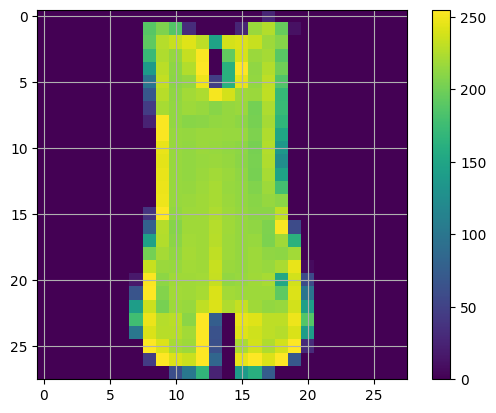

In [ ]:
plt.figure()
plt.imshow(train_images[4])
plt.colorbar()
plt.grid(True)
plt.show()

In [ ]:
train_images = train_images / 255.0

In [ ]:
train_images

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

<function matplotlib.pyplot.show(close=None, block=None)>

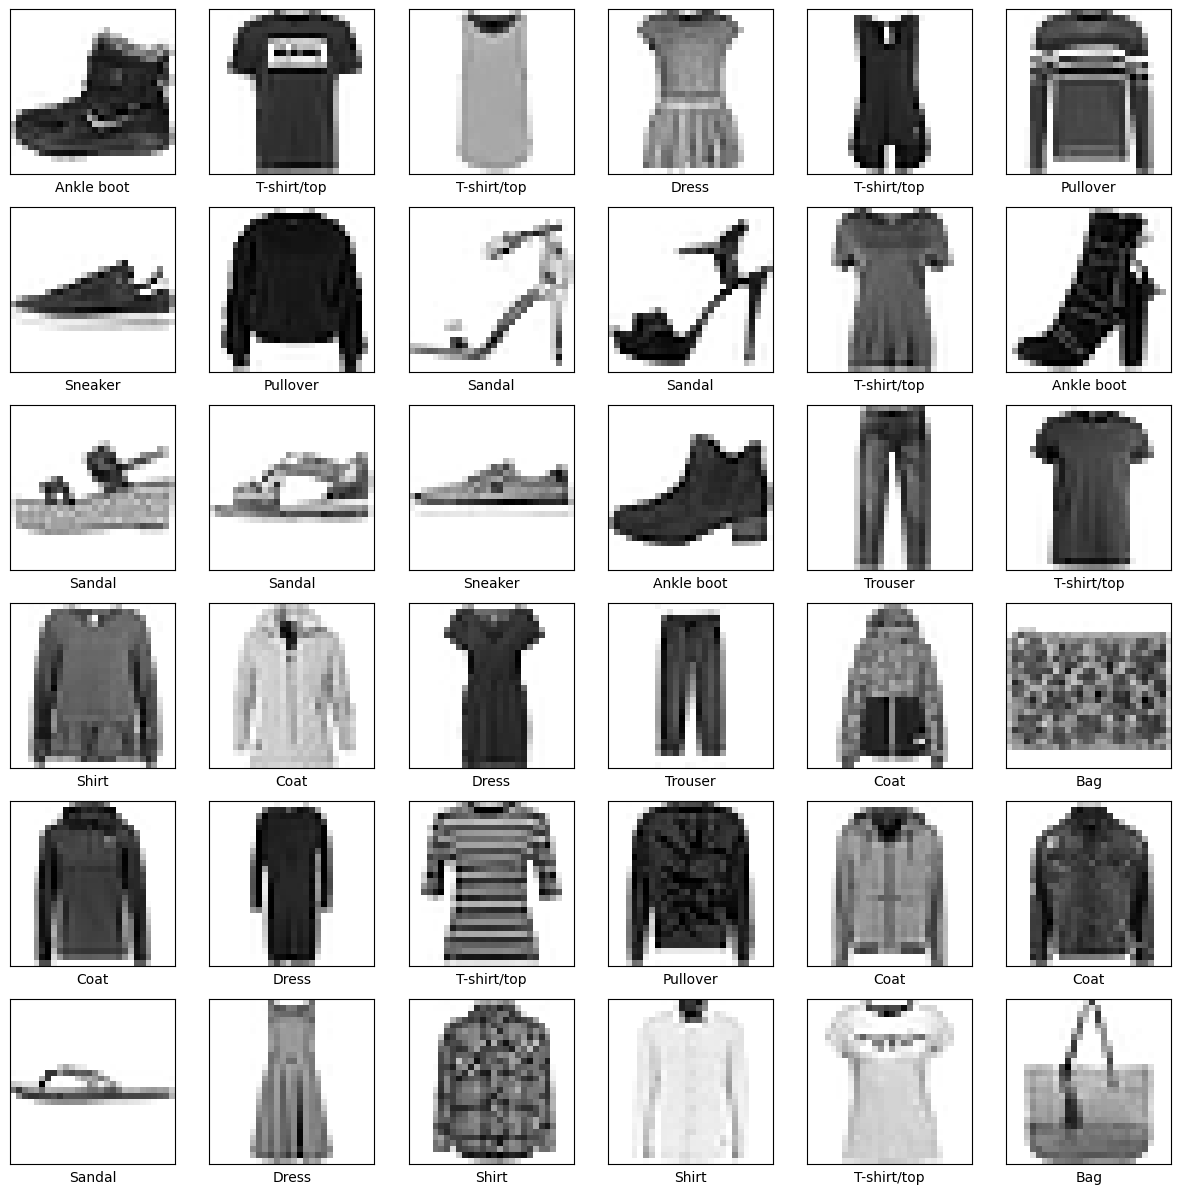

In [ ]:
plt.figure(figsize=(15,15))
for i in range(36):
  plt.subplot(6,6, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(True)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_name[train_labels[i]])
plt.show

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

In [ ]:
model.fit(train_images, train_labels, epochs=4)

Epoch 1/4
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4965 - accuracy: 0.8263
Epoch 2/4
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3768 - accuracy: 0.8634
Epoch 3/4
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3371 - accuracy: 0.8766
Epoch 4/4
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3124 - accuracy: 0.8855


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest Accuracy: {}'.format(test_acc))

313/313 - 1s - loss: 53.0248 - accuracy: 0.8601 - 566ms/epoch - 2ms/step

Test Accuracy: 0.8600999712944031


In [ ]:
predictions = model.predict(test_images)

313/313 [==============================] - 2s 6ms/step


In [ ]:
predictions[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.99999994],
      dtype=float32)